In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from geopy.distance import distance

#### Input the filename and read to dataframe

In [248]:
csvfilename = 'run5.csv'
df = pd.read_csv(csvfilename)
start_time = df['Timestamp'].iloc[0]
df['Timestamp']=df['Timestamp']-start_time

i = 0
while i < len(df) and df['MetaX'].iloc[i] == df['MetaY'].iloc[i] == df['MetaZ'].iloc[i] == 0:
    df = df.drop(df.index[i])
    i = 0 

## Plot the Headset Coordinates over Time

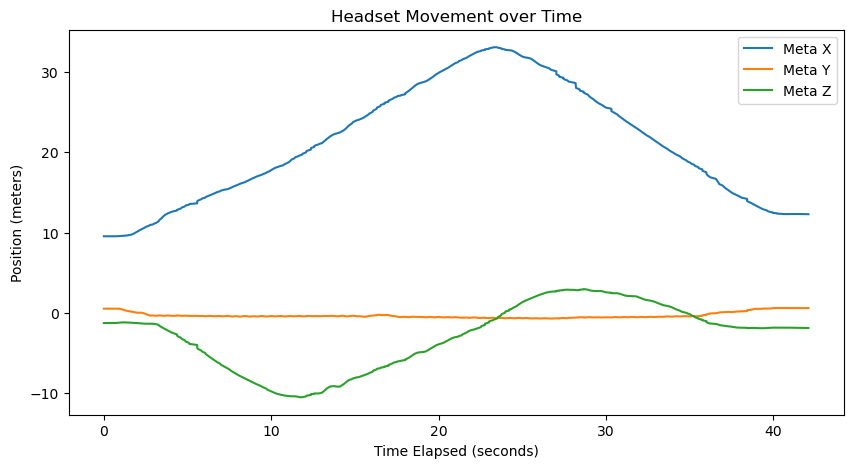

In [242]:
plt.figure(figsize=(10,5))
plt.plot(df['Timestamp'] - df['Timestamp'].iloc[0], df['MetaX'], label = 'Meta X')
plt.plot(df['Timestamp'] - df['Timestamp'].iloc[0], df['MetaY'], label = 'Meta Y')
plt.plot(df['Timestamp'] - df['Timestamp'].iloc[0], df['MetaZ'], label = 'Meta Z')
plt.xlabel('Time Elapsed (seconds)')
plt.ylabel('Position (meters)')
plt.title('Headset Movement over Time')
plt.legend()

## Plot the Headset Trajectory

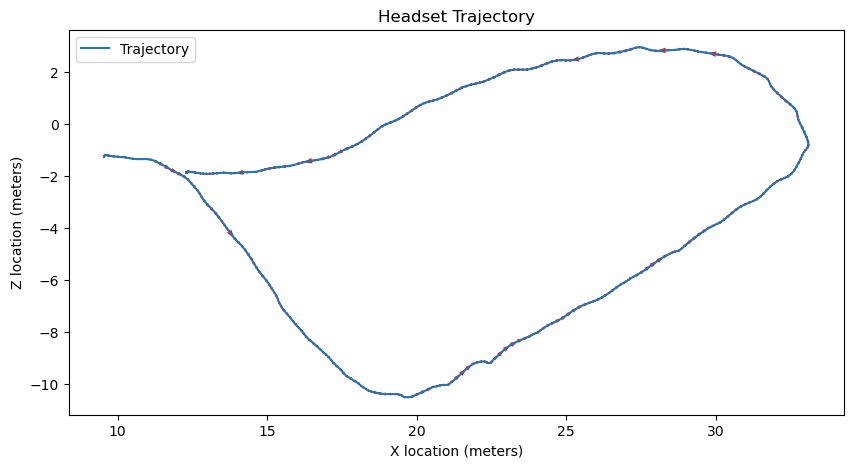

In [243]:
plt.figure(figsize=(10,5))
plt.plot(df['MetaX'], df['MetaZ'], label='Trajectory')
dx = np.diff(df['MetaX'])
dz = np.diff(df['MetaZ'])
plt.quiver(df['MetaX'][:-1], df['MetaZ'][:-1], dx, dz, scale_units='xy', angles='xy', scale=1, color='r')

plt.xlabel('X location (meters)')
plt.ylabel('Z location (meters)')
plt.title('Headset Trajectory')
plt.legend()
plt.show()

#### Create a second dataframe (filter_df) with only pedestrian lidar detection (LidarID == 10).
#### Create a third dataframe (rel_ped_df) with only "relevant" lidar detections*

\* this data frame should not be used without examination of df and/or filter_df. For scenarios where the lidar has breaks in detections, some segments will not be included in the rel_ped_df depending on their length.

In [249]:
allIDS = list(set(df['LidarID']))
pedIDs = list(set(df[df['ClassType'].astype(int) == 10]['LidarID']))
filtered_df = df[df['ClassType'].astype(int) == 10]
rel_IDs = []
for ID in allIDS:
    temp_df = filtered_df[filtered_df['LidarID'].astype(int)==ID]
    if (len(temp_df)) <= 1:
        randomvar=1
    elif (max(temp_df['LidarX']) - min(temp_df['LidarX']) <= 1) and (max(temp_df['LidarY']) - min(temp_df['LidarY']) <= 1):
        randomvar=1
    else:
        rel_IDs.append(int(ID))
rel_ped_df = df[df['LidarID'].astype(int).isin(rel_IDs)]

## Plotting the Lidar Data X VS. TIME

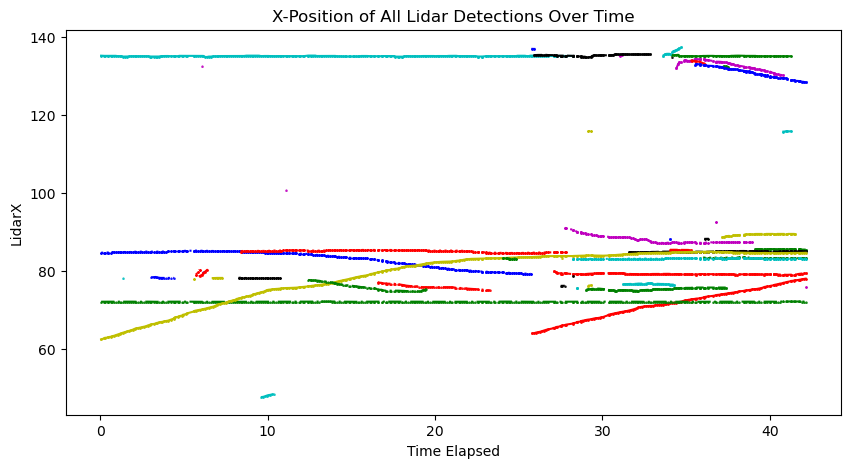

In [250]:
line_styles = ['-', '--', '-.', ':']  # Choose from '-', '--', '-.', ':'
markers = ['o', 's', '^', 'D']       # Choose from 'o', 's', '^', 'D'
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Choose from 'b', 'g', 'r', 'c', 'm', 'y', 'k'

plt.figure(figsize=(10,5))
for i, ID in enumerate(pedIDs):
    style = line_styles[i % len(line_styles)]  # Cycle through line styles
    marker = markers[i % len(markers)]        # Cycle through markers
    color = colors[i % len(colors)]            # Cycle through colors
    plt.plot(df[df['LidarID'].astype(int) == ID]['Timestamp'],
             df[df['LidarID'].astype(int) == ID]['LidarX'],
             linestyle=style, marker=marker, color=color, markersize=1, label='{}'.format(ID))  # Adjust markersize here
#plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Time Elapsed')
plt.ylabel('LidarX')
plt.title('X-Position of All Lidar Detections Over Time')
plt.show()

## Plot all Lidar Trajectories Together

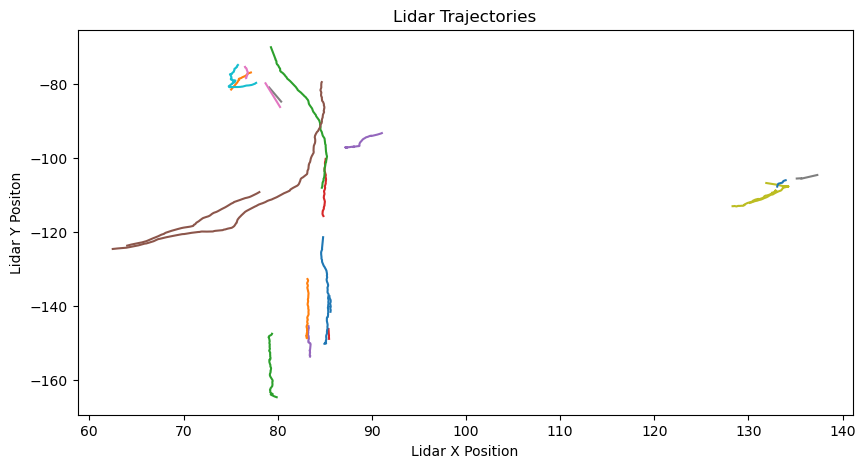

In [253]:
plt.figure(figsize=(10,5))
for i, ID in enumerate(rel_IDs):
    #style = line_styles[i % len(line_styles)]  # Cycle through line styles
    #marker = markers[i % len(markers)]        # Cycle through markers
    #color = colors[i % len(colors)]            # Cycle through colors
    plt.plot(df[df['LidarID'].astype(int) == ID]['LidarX'],
         df[df['LidarID'].astype(int) == ID]['LidarY'],
         label='{}'.format(ID))  # Adjust markersize here
#plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Lidar X Position')
plt.ylabel('Lidar Y Positon')
plt.title('Lidar Trajectories')
plt.show()

## Plot Lidar Trajectories Separately

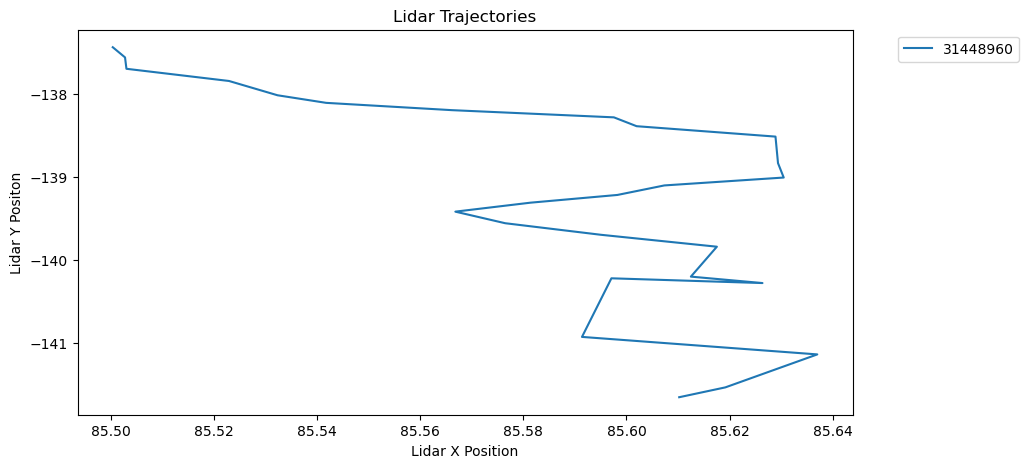

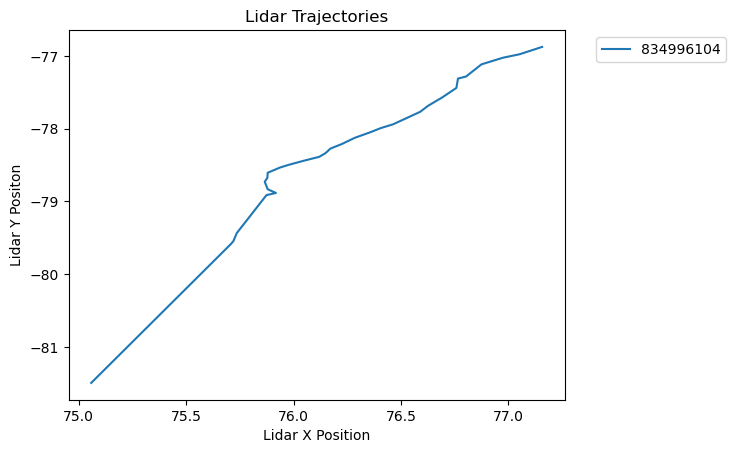

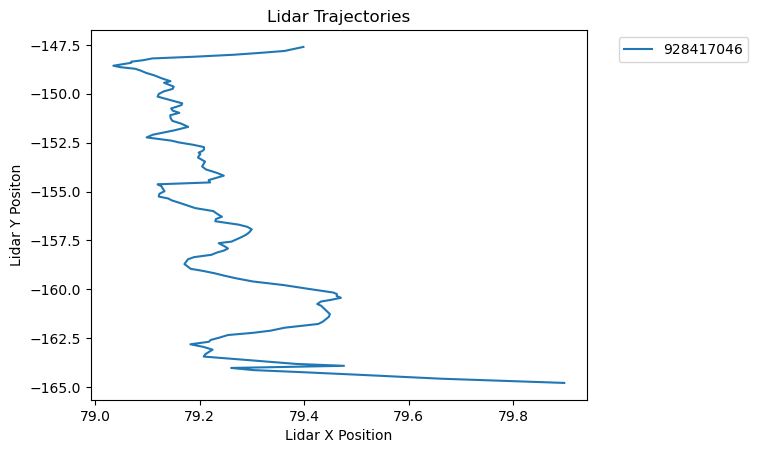

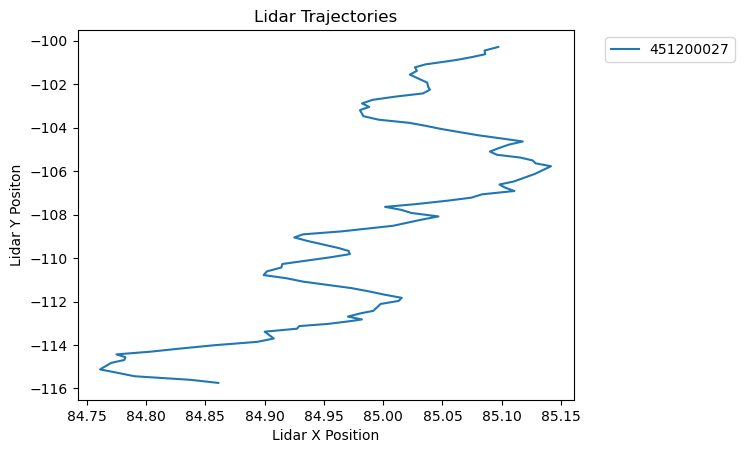

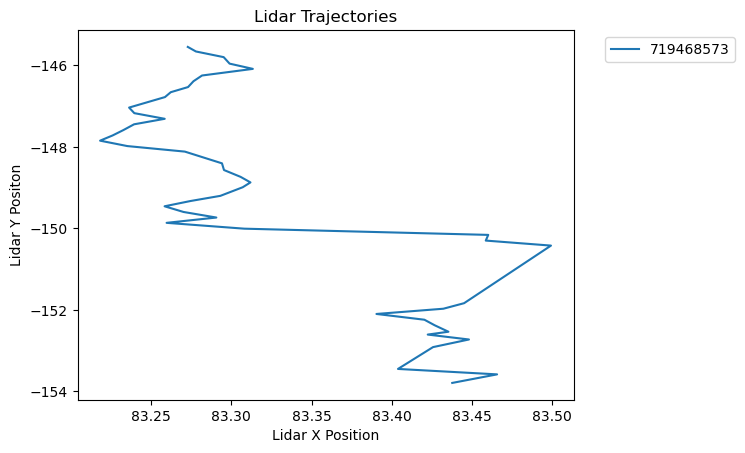

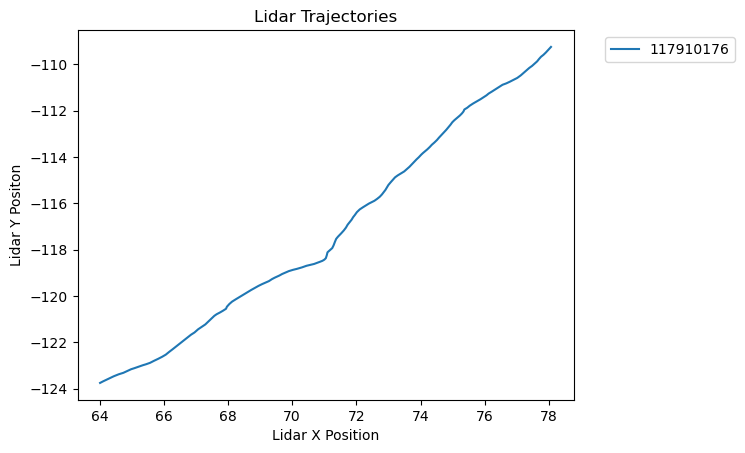

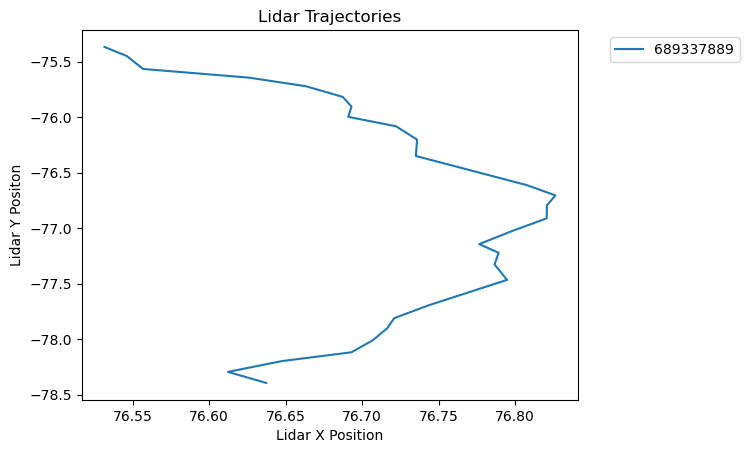

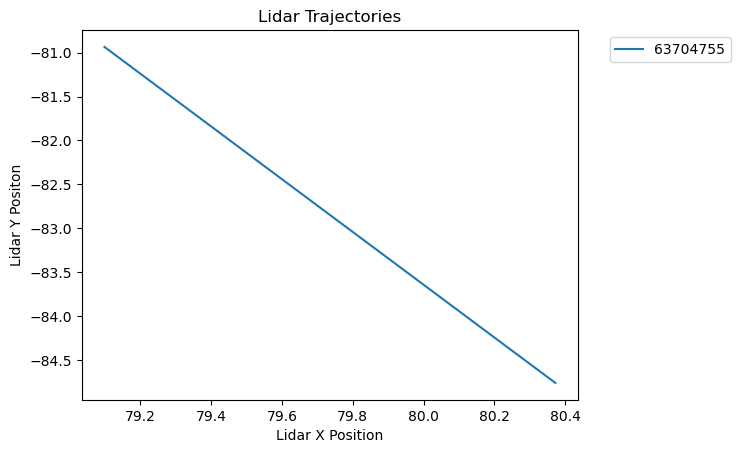

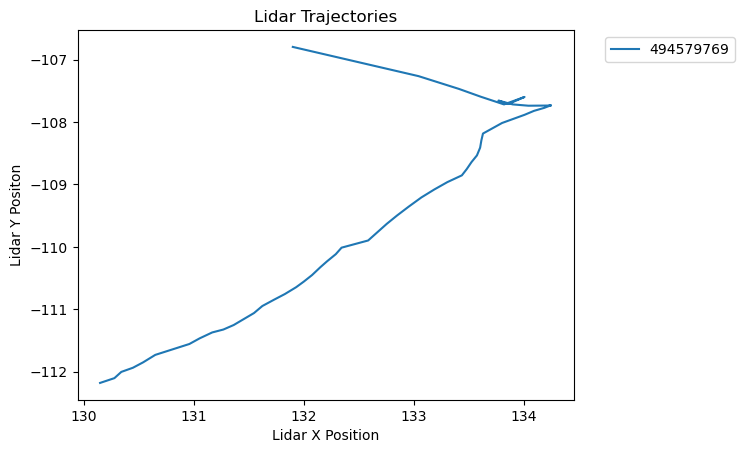

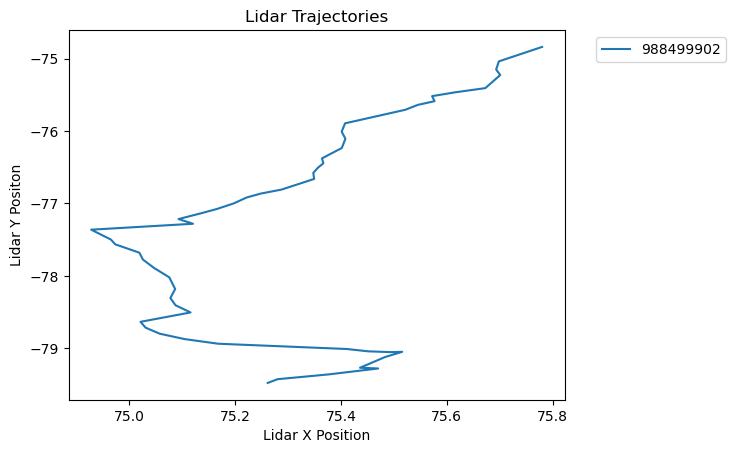

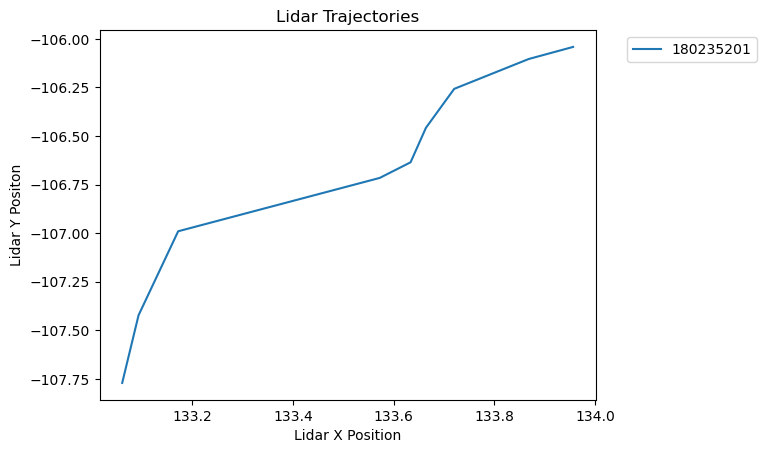

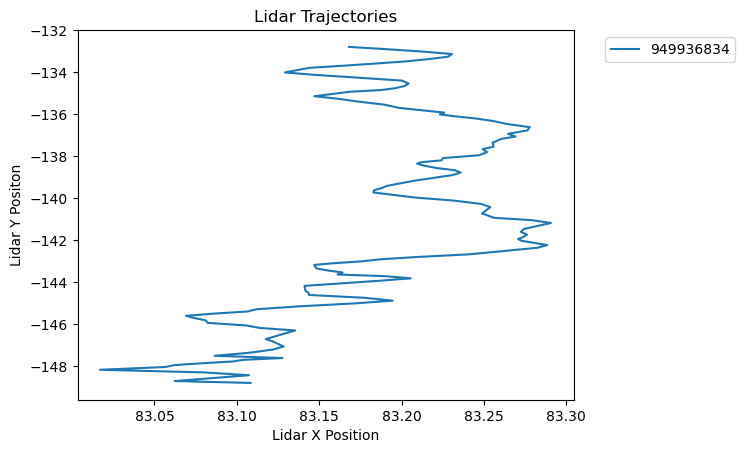

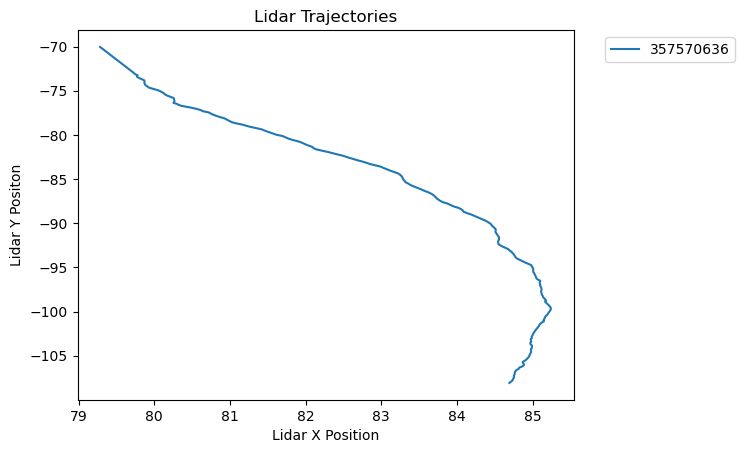

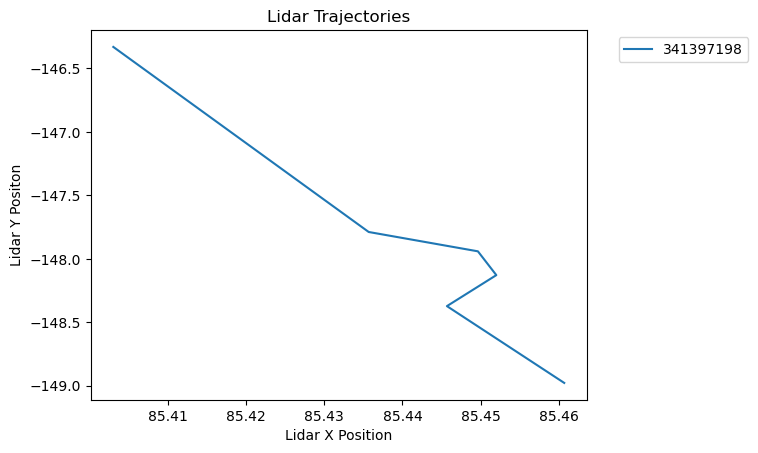

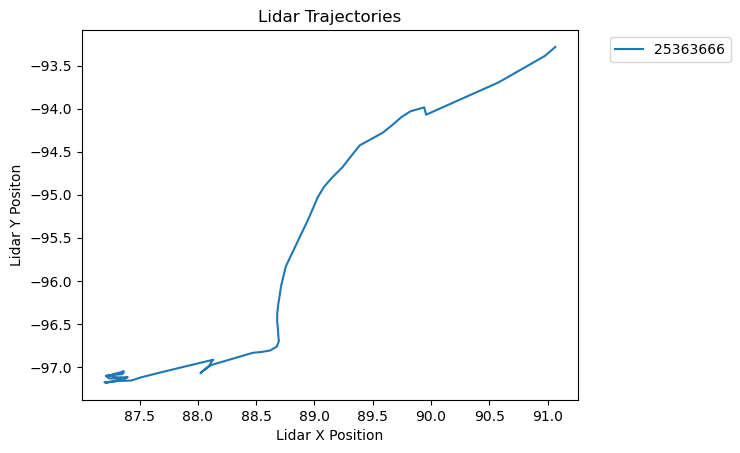

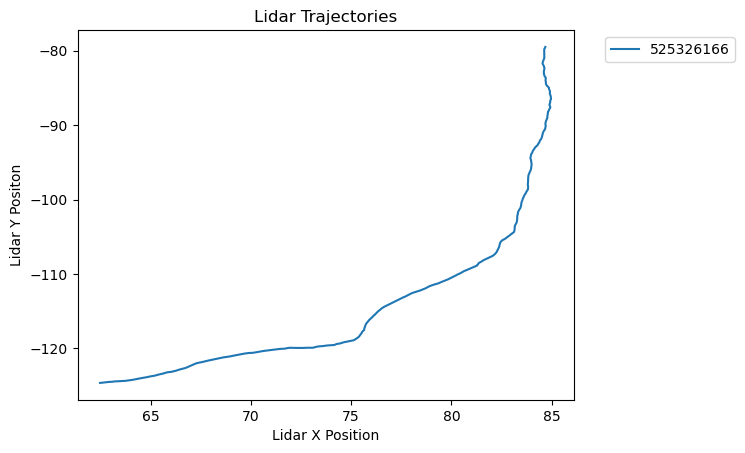

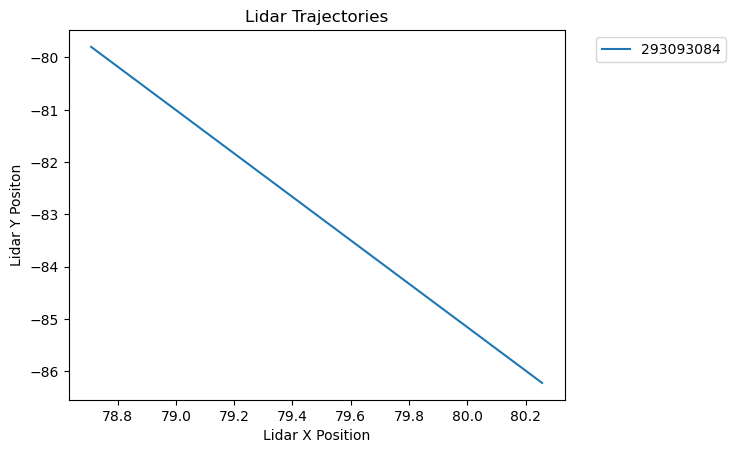

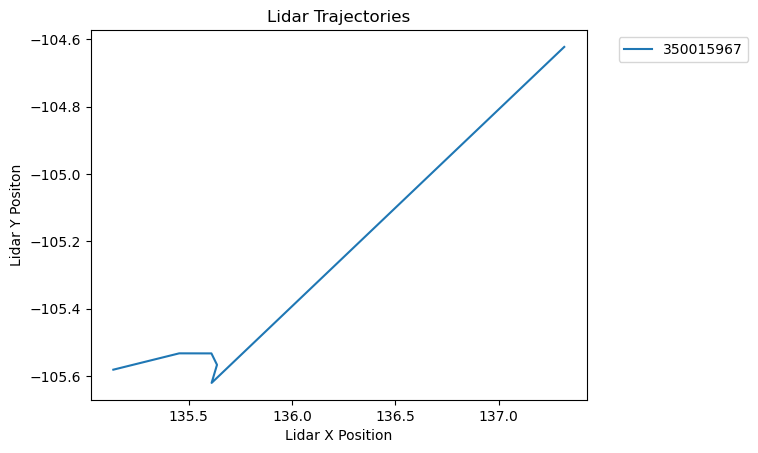

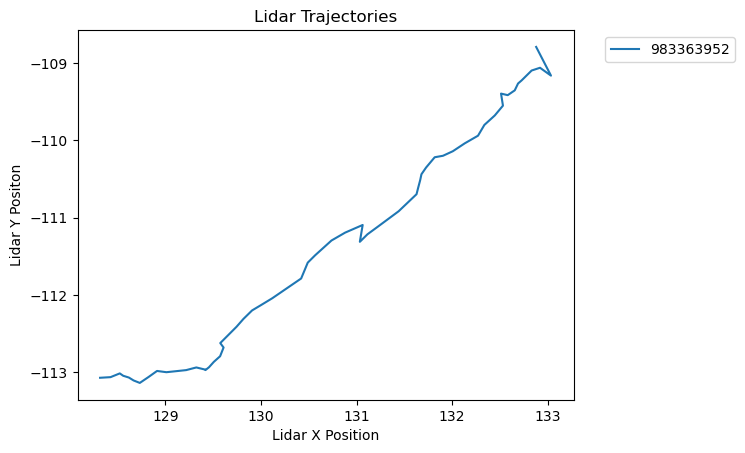

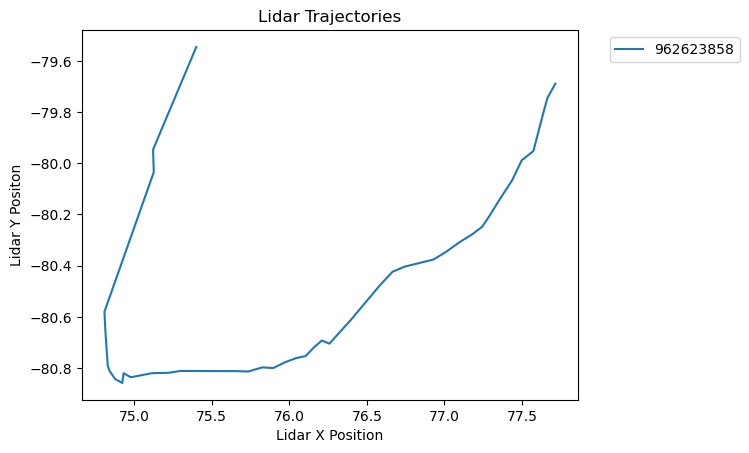

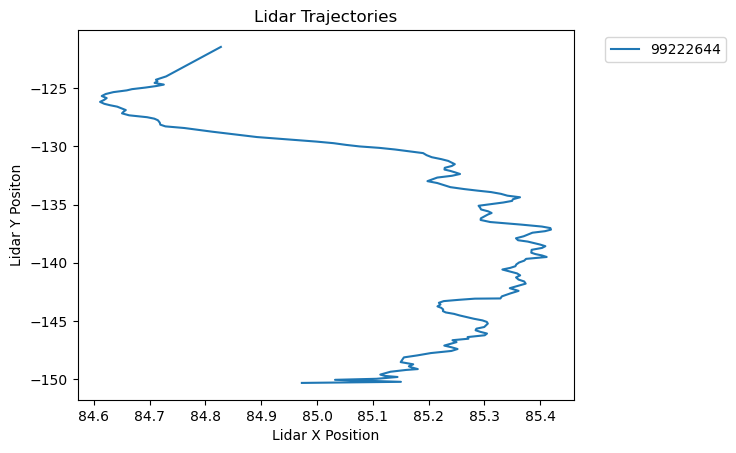

In [254]:
plt.figure(figsize=(10,5))
for i, ID in enumerate(rel_IDs):
    #style = line_styles[i % len(line_styles)]  # Cycle through line styles
    #marker = markers[i % len(markers)]        # Cycle through markers
    #color = colors[i % len(colors)]            # Cycle through colors
    plt.plot(df[df['LidarID'].astype(int) == ID]['LidarX'],
         df[df['LidarID'].astype(int) == ID]['LidarY'],
         label='{}'.format(ID))  # Adjust markersize here
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.xlabel('Lidar X Position')
    plt.ylabel('Lidar Y Positon')
    plt.title('Lidar Trajectories')
    plt.show()

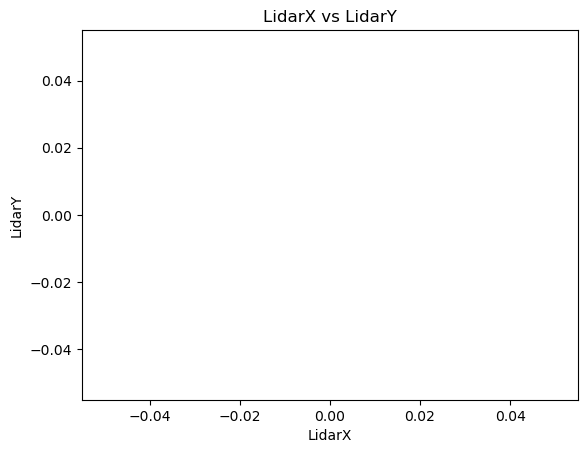

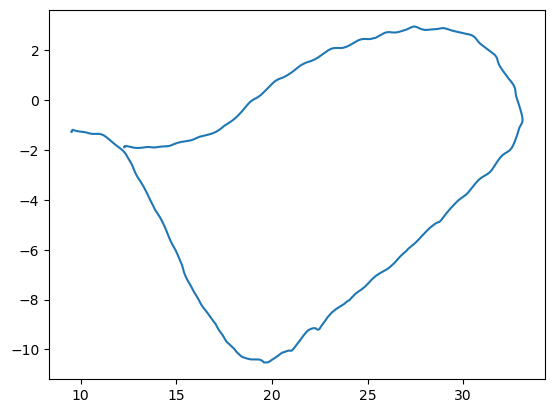

In [257]:
ID= 1 #insert ID if you want to compare. you WILL notice a time issue between the two...

plt.scatter(df[df['LidarID'] == ID]['LidarX'], df[df['LidarID'] == ID]['LidarY'])
plt.xlabel('LidarX')
plt.ylabel('LidarY')
plt.title('LidarX vs LidarY')
plt.show()

#plt.plot(df[df['LidarID'] == ID]['MetaX'], df[df['LidarID'] == ID]['MetaZ'])
plt.plot(df['MetaX'], df['MetaZ'])